In [53]:
#Importing libraries
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score as cvs
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Importing the dataset
df = pd.read_excel(r'C:\Users\Arpita\Desktop\CarPrice.xlsx')
df

,name,year,price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [29]:
df.head()

,name,year,price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [30]:
df.tail()

,name,year,price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


# Data Inspection

In [31]:
df.shape

(4340, 8)

In [32]:
df.dtypes

name            object
year             int64
price            int64
km_driven        int64
fuel            object
seller_type     object
transmission    object
owner           object
dtype: object

In [33]:
df.columns

Index(['name', 'year', 'price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4340 non-null   object
 1   year          4340 non-null   int64 
 2   price         4340 non-null   int64 
 3   km_driven     4340 non-null   int64 
 4   fuel          4340 non-null   object
 5   seller_type   4340 non-null   object
 6   transmission  4340 non-null   object
 7   owner         4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [64]:
df.describe()

,name,year,price,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,751.591244,19.091244,5.041273e+05,391.302074,2.469124,0.794470,0.896774,0.820276
std,400.046963,4.213146,5.785487e+05,200.390606,1.508435,0.458629,0.304289,1.233494
min,0.000000,0.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,432.000000,17.000000,2.087498e+05,229.000000,1.000000,1.000000,1.000000,0.000000
50%,793.000000,20.000000,3.500000e+05,405.000000,1.000000,1.000000,1.000000,0.000000
75%,1048.000000,22.000000,6.000000e+05,573.000000,4.000000,1.000000,1.000000,2.000000
max,1490.000000,26.000000,8.900000e+06,769.000000,4.000000,2.000000,1.000000,4.000000


# Checking for Null values

In [35]:
df.isnull().sum()

name            0
year            0
price           0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
dtype: int64

We can see that there are no null values.

<AxesSubplot:>

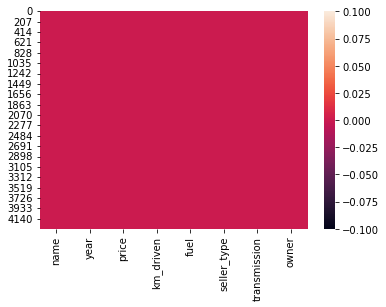

In [36]:
sn.heatmap(df.isnull())

# Checking for outliers and skewness

Since most of the variables are of object data type, we will not check for outliers or skewness.

# EDA

<AxesSubplot:xlabel='price'>

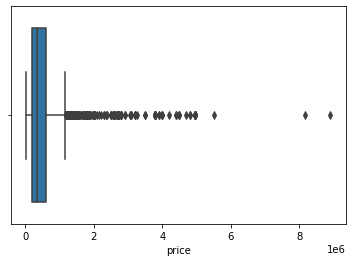

In [38]:
sn.boxplot(df['price'])

There are many outliers but since it's the target variable, hence we will not treat the outliers.

<AxesSubplot:xlabel='price', ylabel='Density'>

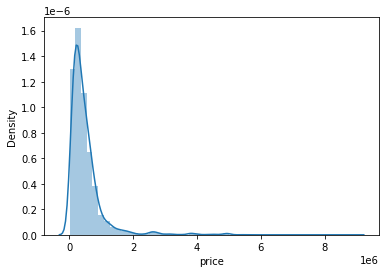

In [39]:
sn.distplot(df['price'])

The data is very tightly distributed here and is almost normalized

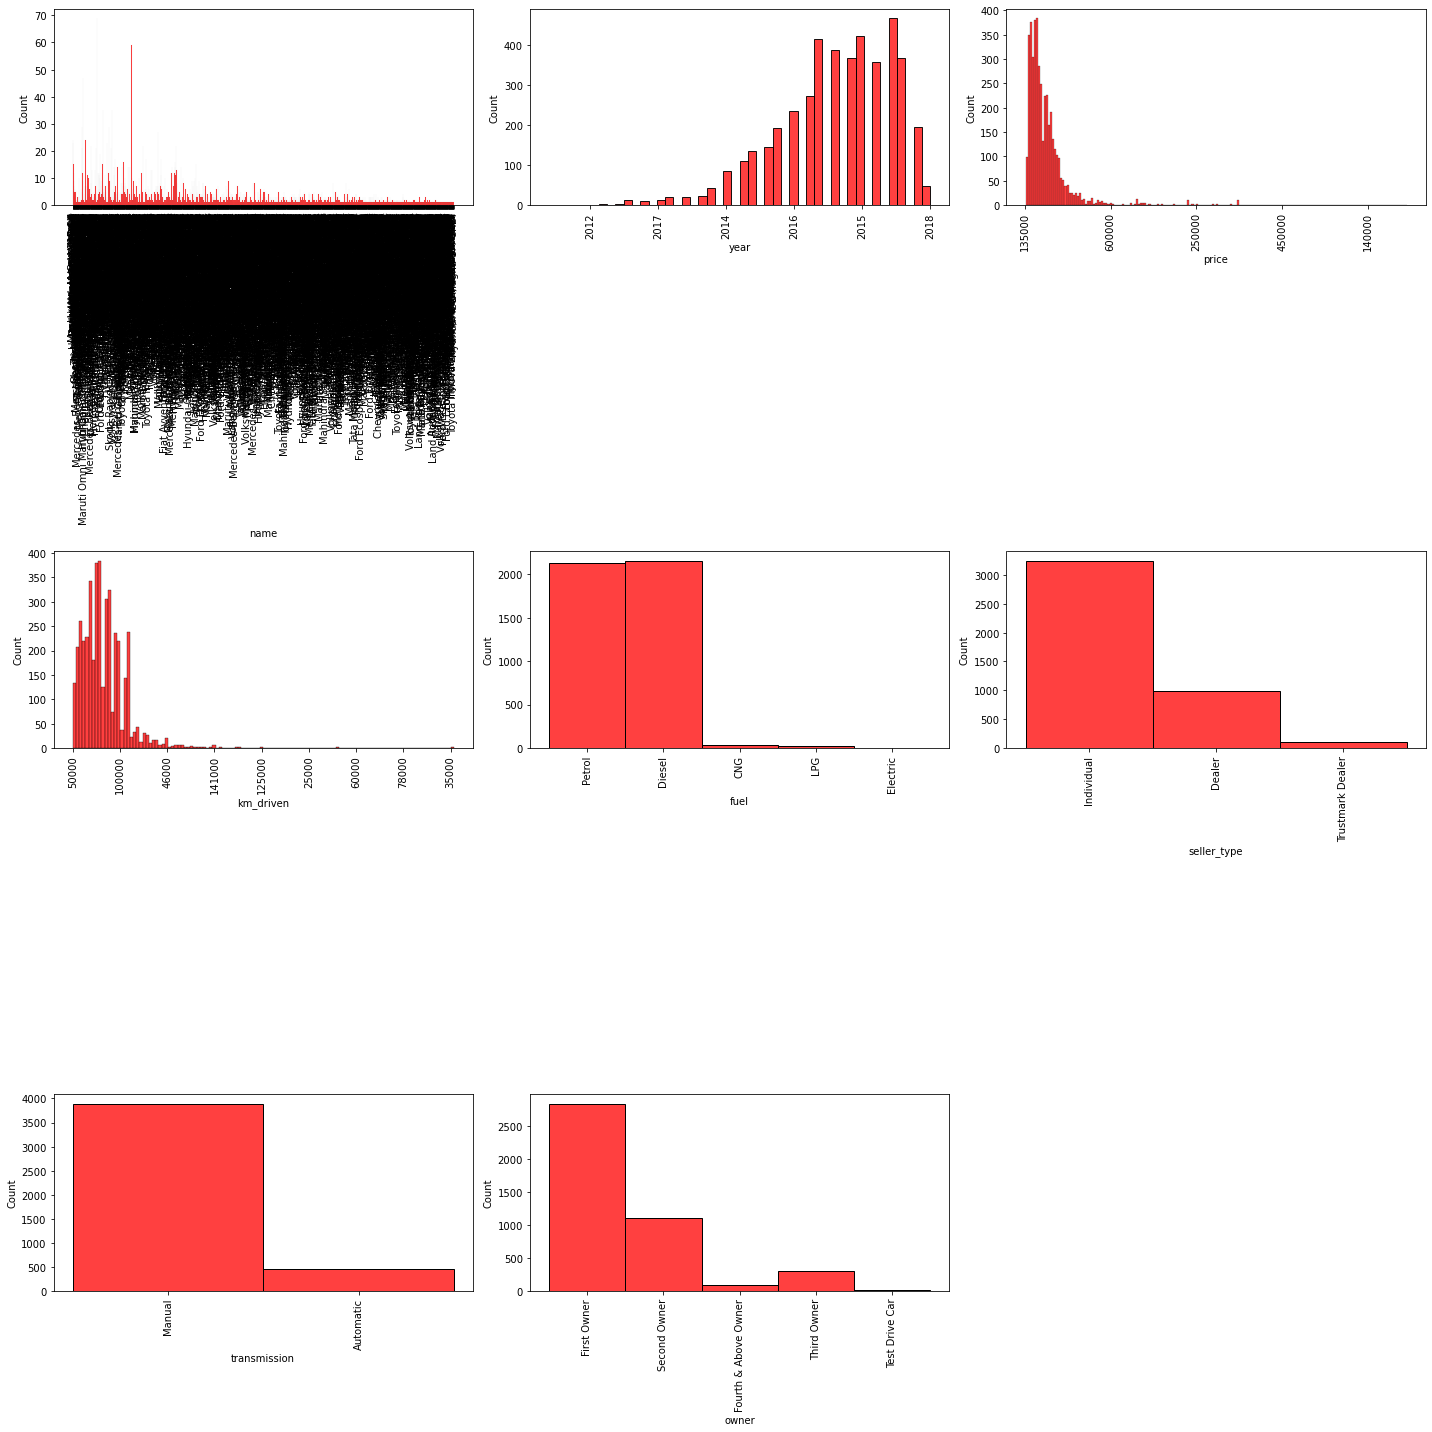

In [40]:
collist=df.columns.values
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(3,3,i+1)
    sn.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)
    plt.tight_layout()

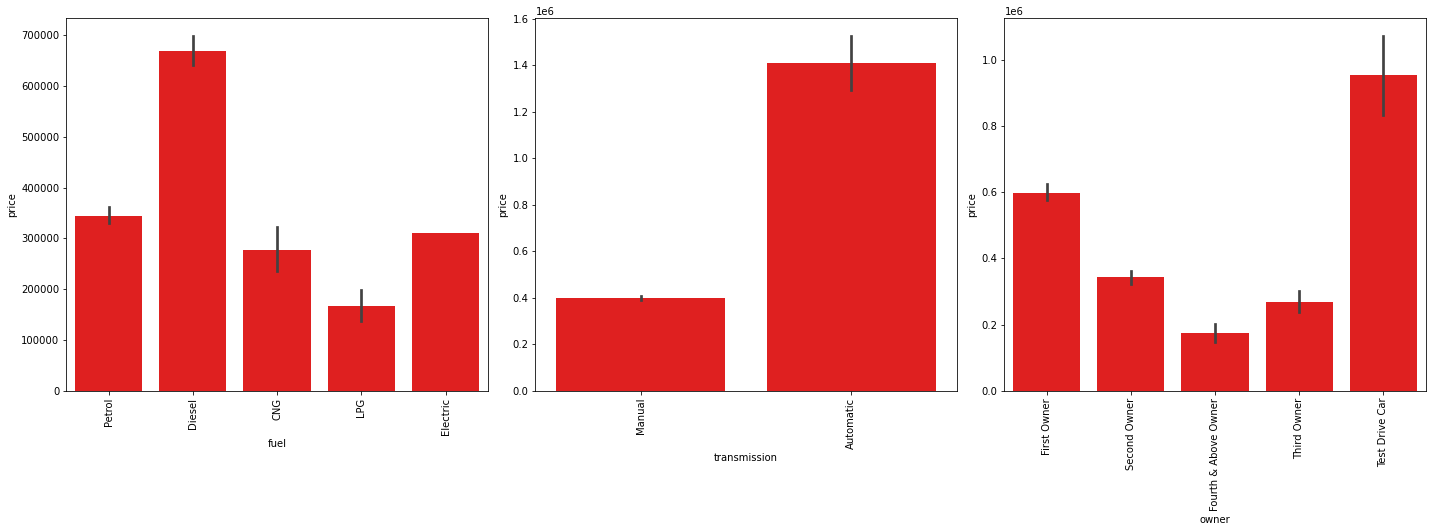

In [41]:
newcollist=['fuel','transmission','owner']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sn.barplot(data=df,x=i[1],y='price',color='red')
    plt.xticks(rotation=90)
    plt.tight_layout()

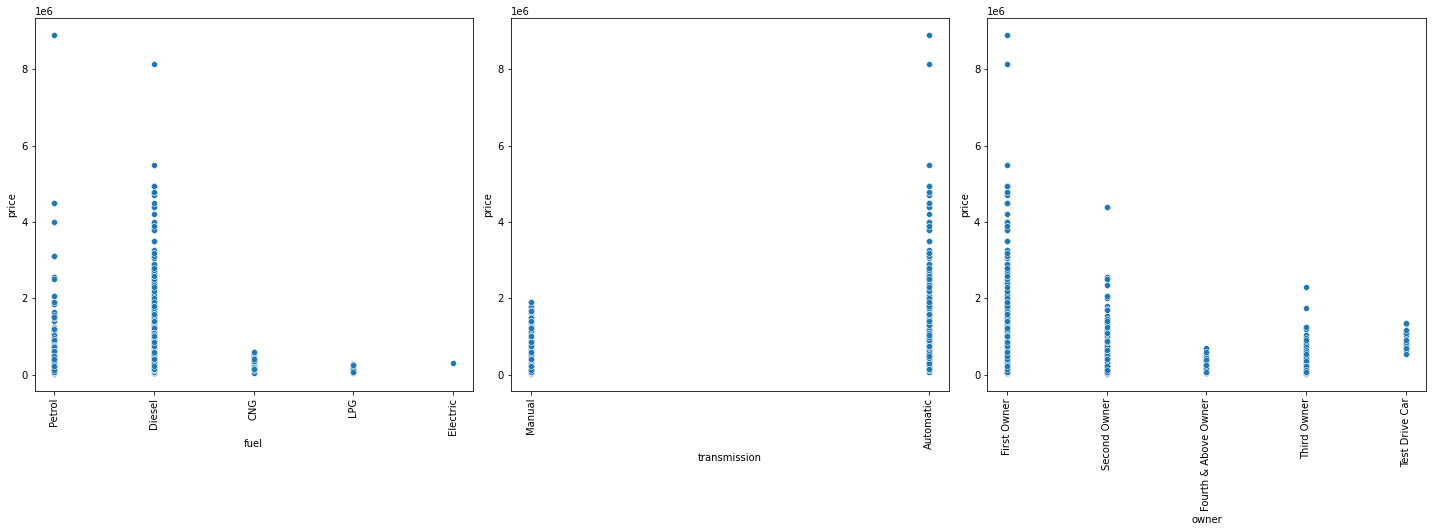

In [42]:
newcollist=['fuel','transmission','owner']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sn.scatterplot(data=df,x=i[1],y='price')
    plt.xticks(rotation=90)
    plt.tight_layout()

In [43]:
le = LabelEncoder()
for column in df.drop(['price'],axis=1).columns:
    df[column]=le.fit_transform(df[column])
df 

,name,year,price,km_driven,fuel,seller_type,transmission,owner
0,775,13,60000,474,4,1,1,0
1,1041,13,135000,335,4,1,1,0
2,505,18,600000,607,1,1,1,0
3,118,23,250000,309,4,1,1,0
4,279,20,450000,681,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,602,20,409999,528,1,1,1,2
4336,601,20,409999,528,1,1,1,2
4337,777,15,110000,547,4,1,1,2
4338,381,22,865000,573,1,1,1,0


Transforming the data from object to ordinal type.

# Multivariate Analysis

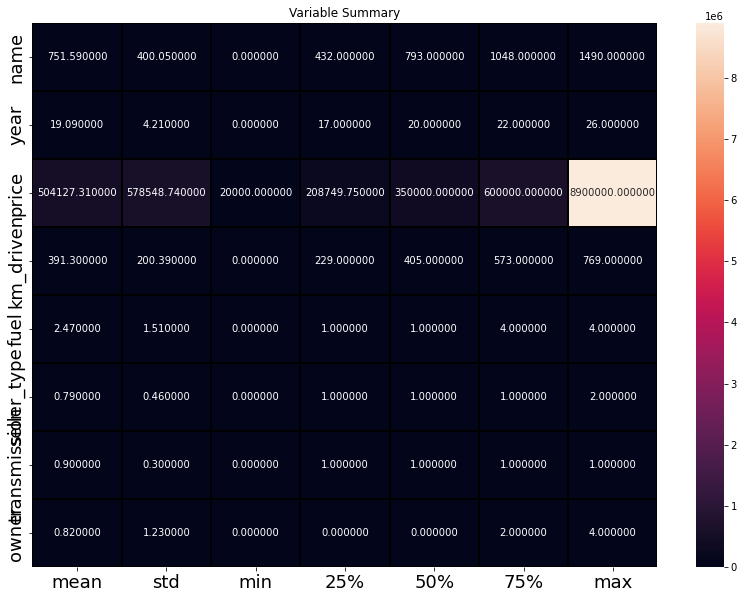

In [44]:
plt.figure(figsize=(14,10))
sn.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

It gives us the statistical summary(which includes mean, median, standard deviation, minimum value, maximum value and quartile values) of all the numerical columns.

<AxesSubplot:>

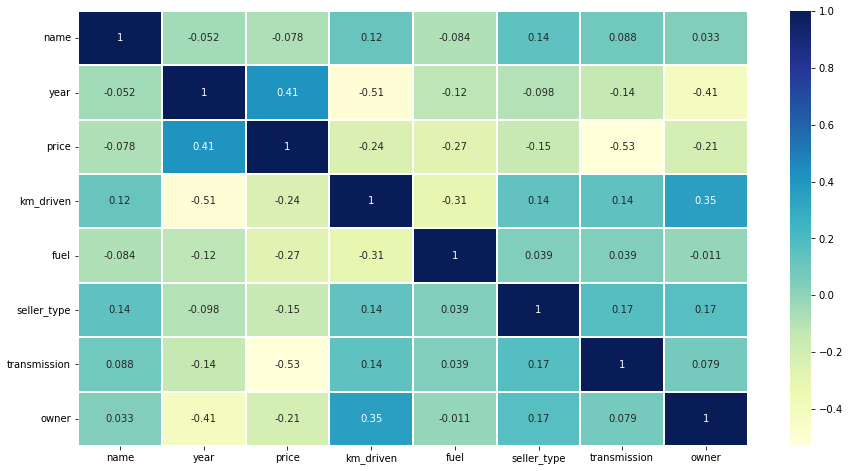

In [45]:
plt.figure(figsize=(15,8))
sn.heatmap(df.corr(), linewidth=0.1, cmap="YlGnBu", annot = True)

There is no multicollinearity in the dataset.

# Building the Model

In [47]:
#Separating feature and target variables into x and y.
x= df.drop(['price'],axis=1)
y=df['price']

In [50]:
#Power transforming and scaling the feaature variables
x=power_transform(x,method='yeo-johnson')
scale = StandardScaler()
x=scale.fit_transform(x)

In [54]:
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)
print('Linear Regression Score:',lr.score(xtrain,ytrain))
print('Linear Regression r2_score:',r2_score(ytest,pred_test))
print("Mean squared error of Linear Regression:",mean_squared_error(ytest,pred_test))
print("Root Mean Square error of Linear Regression:",np.sqrt(mean_squared_error(ytest,pred_test)))

Linear Regression Score: 0.4597931552388893
Linear Regression r2_score: 0.4627270431633177
Mean squared error of Linear Regression: 164181204636.64404
Root Mean Square error of Linear Regression: 405192.79933957866


In [55]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
pred_train_sgd=sgd.predict(xtrain)
pred_test_sgd=sgd.predict(xtest)
print('SGD Regressor Score:',sgd.score(xtrain,ytrain))
print('SGD Regressor r2_score:',r2_score(ytest,pred_test_sgd))
print("Mean squared error of SGD Regressor:",mean_squared_error(ytest,pred_test_sgd))
print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_sgd)))

SGD Regressor Score: 0.4595170718618905
SGD Regressor r2_score: 0.460618181855316
Mean squared error of SGD Regressor: 164825635713.16403
Root Mean Square error of SGD Regressor: 405987.23589931254


In [56]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
pred_train_knr=knr.predict(xtrain)
pred_test_knr=knr.predict(xtest)
print('K Neighbors Regressor Score:',knr.score(xtrain,ytrain))
print('K Neighbors Regressor r2_score:',r2_score(ytest,pred_test_knr))
print("Mean squared error of K Neighbors Regressor:",mean_squared_error(ytest,pred_test_knr))
print("Root Mean Square error of K Neighbors Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_knr)))

K Neighbors Regressor Score: 0.7810855538259218
K Neighbors Regressor r2_score: 0.6719625732261776
Mean squared error of K Neighbors Regressor: 100242491657.7412
Root Mean Square error of K Neighbors Regressor: 316610.94683813635


In [57]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
pred_train_dtr=dtr.predict(xtrain)
pred_test_dtr=dtr.predict(xtest)
print('Decision Tree Regressor Score:',dtr.score(xtrain,ytrain))
print('Decision Tree Regressor r2_score:',r2_score(ytest,pred_test_dtr))
print("Mean squared error of Decision Tree Regressor:",mean_squared_error(ytest,pred_test_dtr))
print("Root Mean Square error of Decision Tree Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_dtr)))

Decision Tree Regressor Score: 0.9999006807854582
Decision Tree Regressor r2_score: 0.6998895770384745
Mean squared error of Decision Tree Regressor: 91708488467.27573
Root Mean Square error of Decision Tree Regressor: 302834.09396446054


In [58]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
print('Random Forest Regressor Score:',rf.score(xtrain,ytrain))
print('Random Forest Regressor r2_score:',r2_score(ytest,pred_test_rf))
print("Mean squared error of Random Forest Regressor:",mean_squared_error(ytest,pred_test_rf))
print("Root Mean Square error of Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_rf)))

Random Forest Regressor Score: 0.9662959634702575
Random Forest Regressor r2_score: 0.7757009449986142
Mean squared error of Random Forest Regressor: 68541862344.62291
Root Mean Square error of Random Forest Regressor: 261805.0082496951


# Cross Validation Score

In [59]:
print('Cross Validation Score of Linear Regression is',(cvs(lr,x,y,cv=5).mean())*100)
print('Cross Validation Score of SGD Regressor is',(cvs(sgd,x,y,cv=5).mean())*100)
print('Cross Validation Score of KNeighbors Regressor is',(cvs(knr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Decision Tree Regressor is',(cvs(dtr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Random Forest Regressor is',(cvs(rf,x,y,cv=5).mean())*100)

Cross Validation Score of Linear Regression is 44.173345159513666
Cross Validation Score of SGD Regressor is 44.361461314827245
Cross Validation Score of KNeighbors Regressor is 63.64166310542282
Cross Validation Score of Decision Tree Regressor is 67.82585810573511
Cross Validation Score of Random Forest Regressor is 78.80923091500749


After comparing r2_score and Cross validation score, we will select Random Forest Regressor for Hyper Parameter Tuning.

# Hyper Parameter Tuning

In [60]:
parameter = { 'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],}

gvc = GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gvc.fit(xtrain,ytrain)
gvc.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Getting all the best parameter to apply in our selected model.

In [61]:
carprice = RandomForestRegressor(bootstrap=False,min_samples_leaf=1,max_features='sqrt',min_samples_split=2)
carprice.fit(xtrain,ytrain)
pred=carprice.predict(xtest)
acc=r2_score(ytest,pred)
print('Score of Hyper Parameter Tuned Ranfom Forest Regressor is:',carprice.score(xtrain,ytrain))
print('Accuracy for predicting price of car is', (acc*100),'%')
print("Mean squared error of Hyper Parameter Tuned Random Forest Regressor:",mean_squared_error(ytest,pred))
print("Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred)))

Score of Hyper Parameter Tuned Ranfom Forest Regressor is: 0.9999005306116603
Accuracy for predicting price of car is 75.60763321507945 %
Mean squared error of Hyper Parameter Tuned Random Forest Regressor: 74538800282.56235
Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor: 273017.9486454368


The accuracy of Model 'CarPrice' (Random Forest Regressor) after applying Hyper Tuned Parameters is found to be 75.61% and the score is 0.99 which is quite good.

# Conclusion

In [62]:
a= np.array(ytest)
predicted = np.array(carprice.predict(xtest))
Price=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
Price

,Original,Predicted
0,320000,318139.96
1,350000,271749.67
2,430000,454329.99
3,650000,650000.00
4,150000,150000.00
...,...,...
1297,550000,277600.00
1298,120000,241450.00
1299,900000,281196.00
1300,183000,313999.78


Here, we can see that all the predicted prices are either nearly equal or very close to the original prices of the car. Hence we conclude that our model 'carprice' is working very well. And we shall save it for further use.

# Saving the Model

In [63]:
import pickle
filename = 'CarPrice.pkl'
pickle.dump(carprice,open(filename,'wb'))

Best Model is saved with the name 'CarPrice.pkl'